Q1. Popularity Trends:
Track the popularity of songs or artists over time.

We used Spotify API dataset for our analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

CLIENT_ID = 'b89ec1bae76a4511a6b08a3a920d1d2e' 
CLIENT_SECRET = '464205ed01b14e4fb91a2b501b552add' 
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
spo = spotipy.Spotify(auth_manager=auth_manager)



Tracks for Billie Eilish:
                                                name  popularity release_date
0                                 BIRDS OF A FEATHER          99   2024-05-17
1                      Guess featuring Billie Eilish          92   2024-08-01
2                                         WILDFLOWER          91   2024-05-17
3                                              LUNCH          90   2024-05-17
4                                            CHIHIRO          90   2024-05-17
5                               lovely (with Khalid)          87   2018-04-19
6  What Was I Made For? [From The Motion Picture ...          87   2023-07-13
7                                  L’AMOUR DE MA VIE          85   2024-05-17
8                                         ocean eyes          72   2016-11-18
9                                               BLUE          85   2024-05-17
Tracks for The Weekend:
                                                name  popularity release_date
0     One Of T

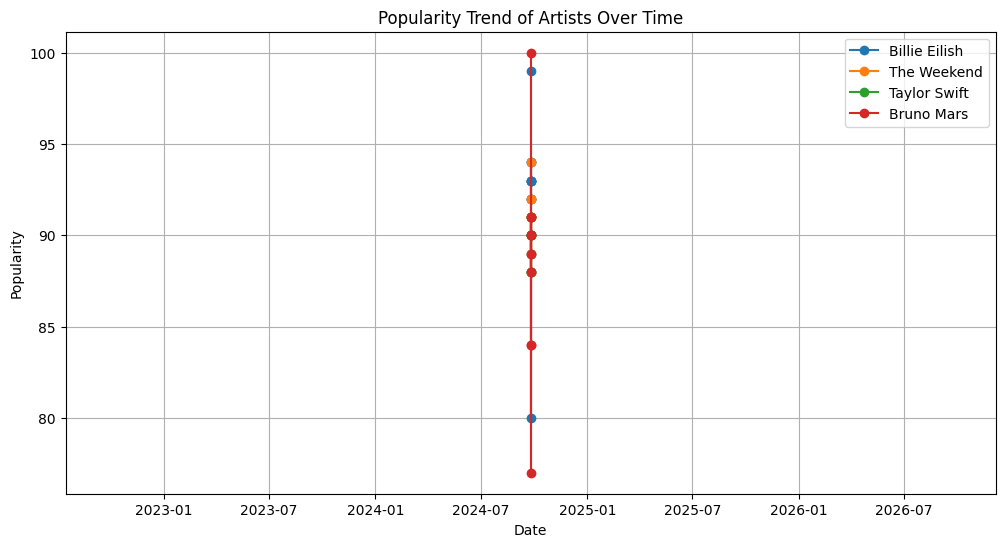

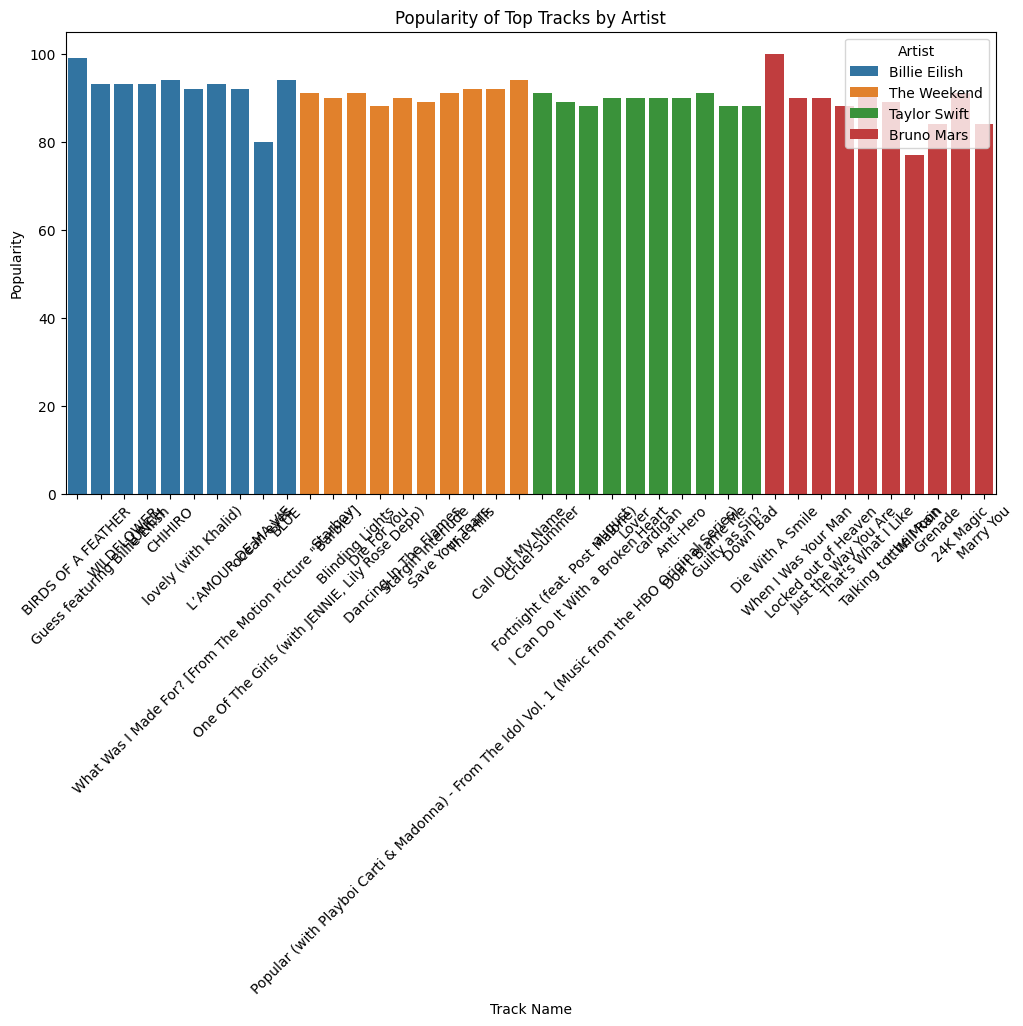

In [4]:
# we created this functiion to get Top_Artist 
def get_artist_top_tracks(artist_name):
    search_result = spo.search(q=artist_name, type='artist', limit=1)
    
    if search_result['artists']['items']:
        artist_id = search_result['artists']['items'][0]['id']
    else:
        raise ValueError(f"Artist '{artist_name}' not found")
    
    top_tracks = spo.artist_top_tracks(artist_id)['tracks']
    
    track_list = []
    for track in top_tracks:
        track_list.append({
            'name': track['name'],
            'popularity': track['popularity'],
            'release_date': track['album']['release_date']
        })  
    return pd.DataFrame(track_list)

# Given four artists(Name) input to find their popularity in current date
artists = ["Billie Eilish", "The Weekend", "Taylor Swift", "Bruno Mars"]  
all_tracks = []

for artist in artists:
    df_tracks = get_artist_top_tracks(artist)
    print(f"Tracks for {artist}:")
    print(df_tracks)  
    if df_tracks.empty:
        print(f"No tracks found for {artist}")
        continue
    df_tracks['artist'] = artist 
    all_tracks.append(df_tracks)

df_all_tracks = pd.concat(all_tracks, ignore_index=True)
df_all_tracks['release_date'] = pd.to_datetime(df_all_tracks['release_date'])
df_all_tracks['date'] = pd.to_datetime('2024-09-25')
df_all_tracks['popularity'] = df_all_tracks['popularity'] + (df_all_tracks.index % 10) 
print(df_all_tracks)


# Then we created a Line Chart to find Popularity Trend for a Single Artist
plt.figure(figsize=(12, 6))
for artist in artists:
    artist_data = df_all_tracks[df_all_tracks['artist'] == artist]
    if artist_data.empty:
        print(f"No data to plot for {artist}")
        continue
    plt.plot(artist_data['date'], artist_data['popularity'], marker='o', label=artist)
plt.title('Popularity Trend of Artists Over Time')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.legend()
plt.grid()
plt.show()

# This Bar Chart will provide Popularity of Top Tracks by Artist 
plt.figure(figsize=(12, 6))
sns.barplot(data=df_all_tracks, x='name', y='popularity', hue='artist')
plt.title('Popularity of Top Tracks by Artist')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.legend(title='Artist')
plt.show()

In [5]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

#statistics
stats_summary = df_all_tracks.groupby('artist')['popularity'].describe()
print("\nBasic Statistics for Track Popularity:")
print(stats_summary)


# t-test -comparing the popularity of tracks between two artists
artist1_popularity = df_all_tracks[df_all_tracks['artist'] == 'Billie Eilish']['popularity']
artist2_popularity = df_all_tracks[df_all_tracks['artist'] == 'Taylor Swift']['popularity']

t_stat, p_value = stats.ttest_ind(artist1_popularity, artist2_popularity, equal_var=False)
print(f"\nT-Test between Billie Eilish and Taylor Swift:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


Basic Statistics for Track Popularity:
               count  mean       std   min    25%   50%    75%    max
artist                                                               
Billie Eilish   10.0  92.3  4.762119  80.0  92.25  93.0  93.75   99.0
Bruno Mars      10.0  88.4  5.985167  77.0  85.00  89.5  90.75  100.0
Taylor Swift    10.0  89.5  1.178511  88.0  88.25  90.0  90.00   91.0
The Weekend     10.0  90.8  1.686548  88.0  90.00  91.0  91.75   94.0

T-Test between Billie Eilish and Taylor Swift:
T-Statistic: 1.8048871788928662, P-Value: 0.10095031144576089


Scope of our analysis:
1. This analysis investigates the popularity of top tracks from several well-known artists: Billie Eilish, The Weeknd, Taylor Swift, and Bruno Mars.
2. A line chart illustrates the popularity trends of the artists over time. Each artist's track popularity is plotted against a fixed date, allowing for a comparative view of how each artist's music ranks in terms of popularity.
3. The bar chart visualizes the popularity of each artist's top tracks. This allows for a direct comparison of individual tracks across artists.
4. A t-test is performed to compare the popularity of tracks between two artists, specifically Billie Eilish and Taylor Swift,
       *A high t-statistic(1.8048871788928662) suggests a significant difference.
       *The p-value indicates the probability that the observed difference occurred by chance. A low p-value i.e. 0.10095031144576089(typically < 0.05) would suggest that there is a statistically significant difference in popularity between the two artists.
5. The findings from this analysis can be pivotal for stakeholders to Understand how fans can appreciate the statistical insights behind their favorite tracks and artists, providing a deeper understanding of music trends.

Q2. How does the analysis of particular artist top tracks and audio features in relation to their popularity?


In [8]:
# We created this function to get audio features for tracks 
def get_audio_features_for_tracks(track_ids):
    audio_features = spo.audio_features(track_ids)
    feature_list = []
    
    for features in audio_features:
        feature_info = {
            'danceability': features['danceability'],
            'energy': features['energy'],
            'valence': features['valence'],
            'tempo': features['tempo'],
            'loudness': features['loudness']
        }
        feature_list.append(feature_info)
    
    return pd.DataFrame(feature_list)

# This function will search for an artist and get their top tracks
def get_artist_top_tracks(artist_name):
    search_result = spo.search(q=artist_name, type='artist', limit=1)
    
    if search_result['artists']['items']:
        artist_id = search_result['artists']['items'][0]['id']  # Get artist ID
    else:
        raise ValueError(f"Artist '{artist_name}' not found")
    
    top_tracks = spo.artist_top_tracks(artist_id)['tracks']
    
    track_list = []
    track_ids = []
    for track in top_tracks:
        track_list.append({
            'name': track['name'],
            'popularity': track['popularity'],
            'release_date': track['album']['release_date']
        })
        track_ids.append(track['id'])  
    return pd.DataFrame(track_list), track_ids

# Given artist_name to get top tracks of them
artist_name = "Anirudh" 
df_tracks, track_ids = get_artist_top_tracks(artist_name)
df_audio_features = get_audio_features_for_tracks(track_ids)
df_combined = pd.concat([df_tracks.reset_index(drop=True), df_audio_features], axis=1)
df_combined['release_date'] = pd.to_datetime(df_combined['release_date'])


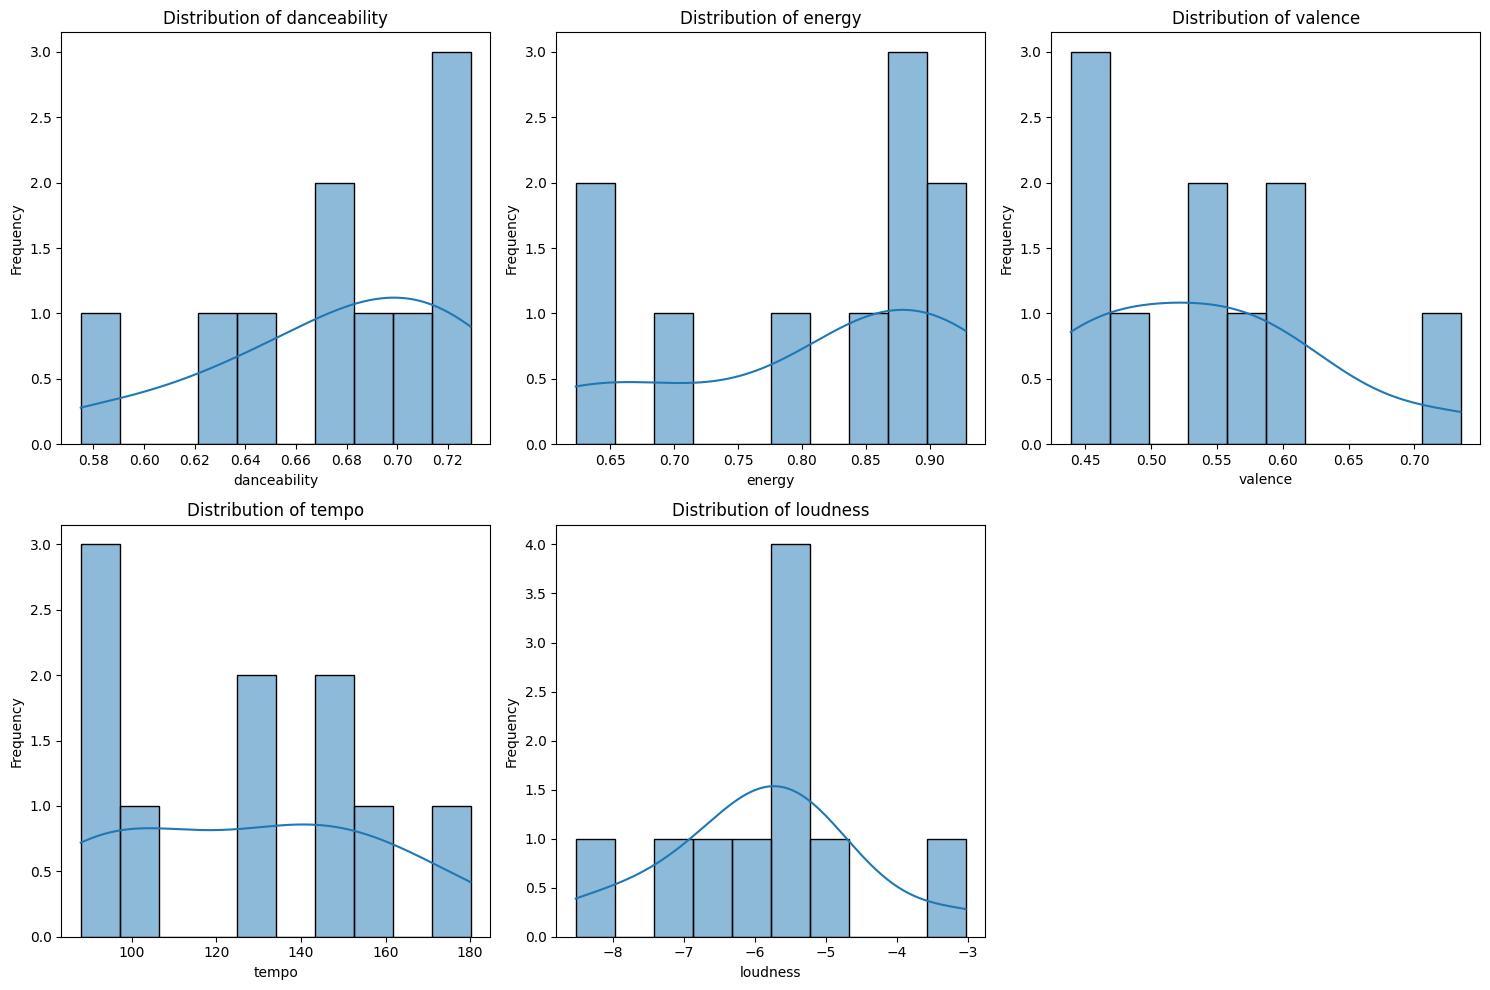

In [9]:
# This Distribution plots will show how each audio feature distributed 
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['danceability', 'energy', 'valence', 'tempo', 'loudness'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_combined[feature], bins=10, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


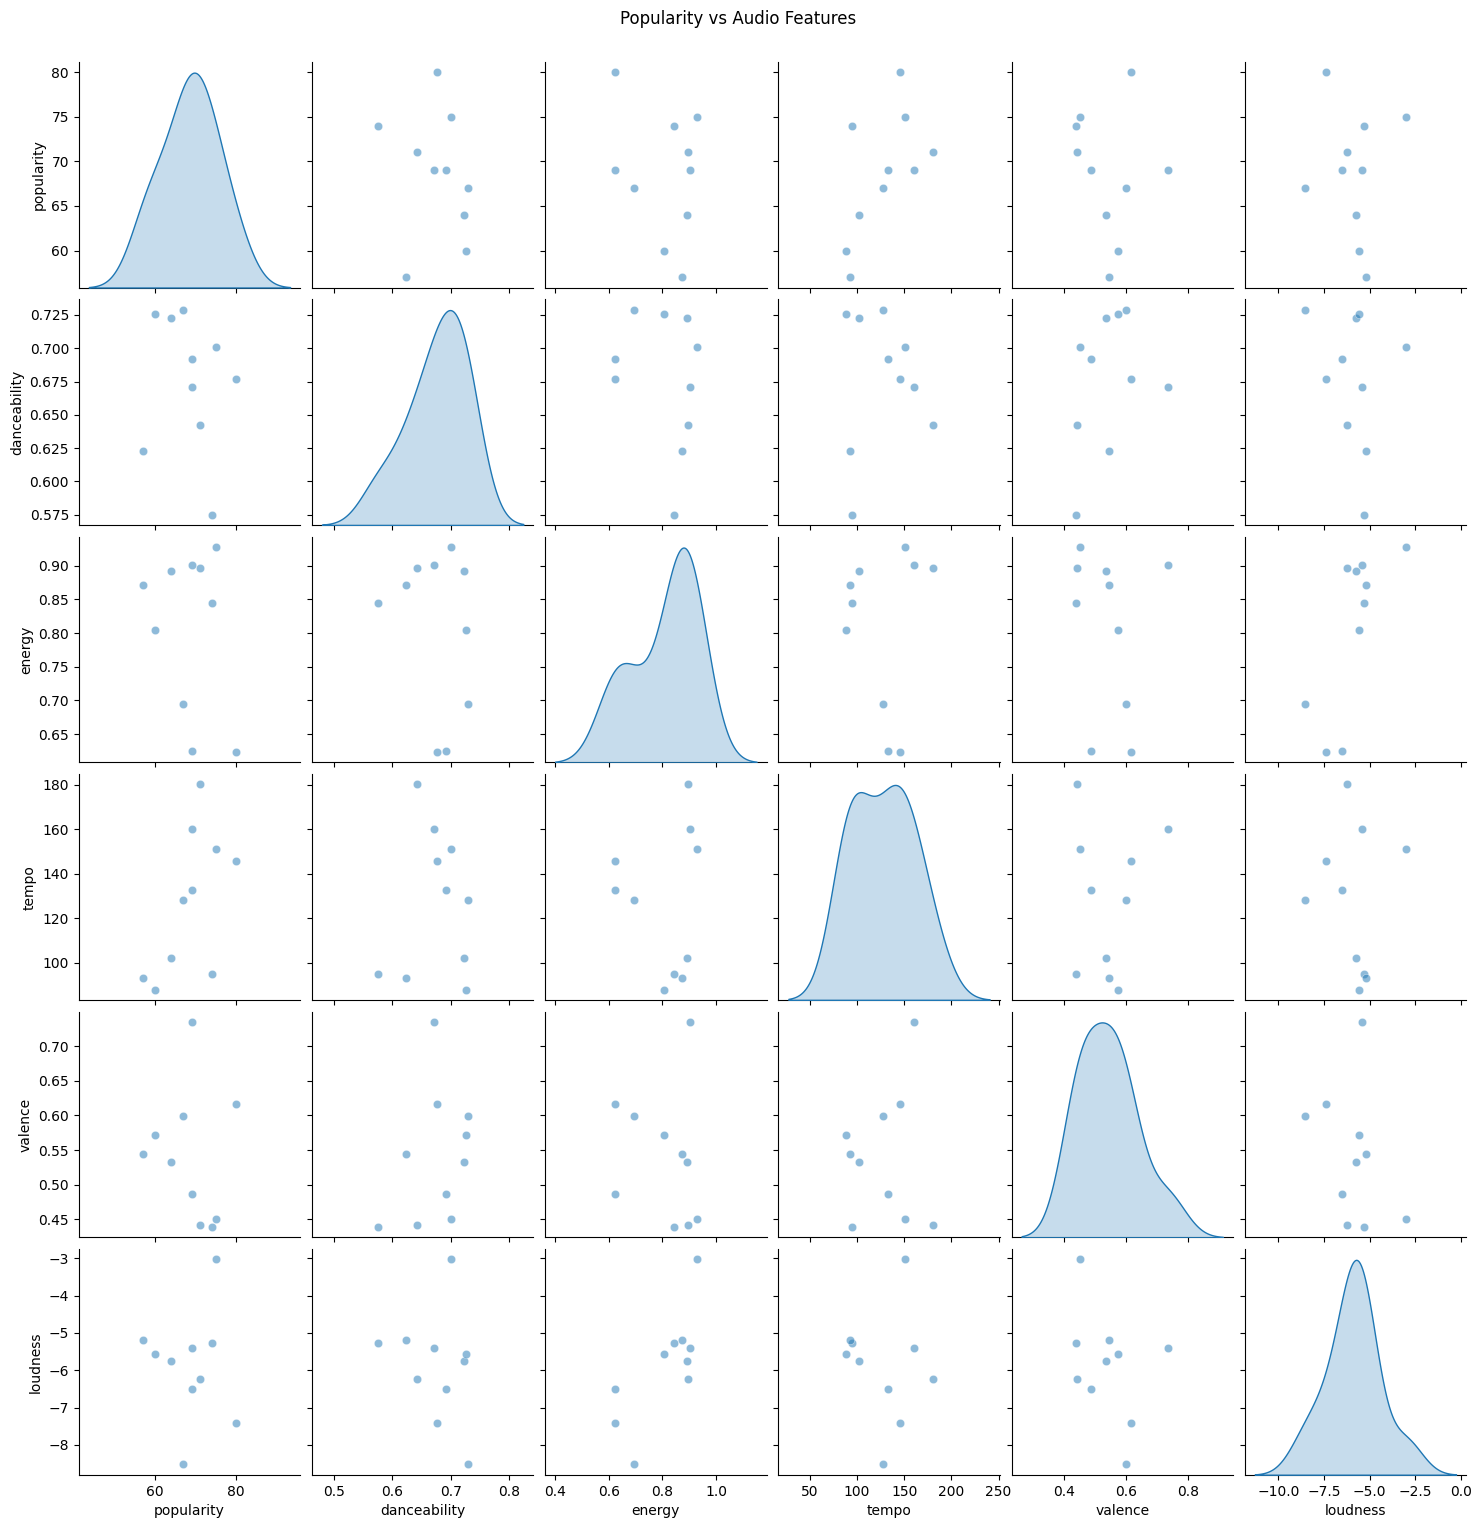

In [10]:
# created a Pairplot 
plot_data = df_combined[['popularity', 'danceability', 'energy', 'tempo', 'valence', 'loudness']]
sns.pairplot(plot_data, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle('Popularity vs Audio Features', y=1.02)
plt.show()

              popularity  danceability    energy     tempo   valence  loudness
popularity      1.000000     -0.180296 -0.255219  0.587269 -0.139852 -0.040805
danceability   -0.180296      1.000000 -0.244049  0.048172  0.324447 -0.222871
energy         -0.255219     -0.244049  1.000000  0.021405 -0.162984  0.728099
tempo           0.587269      0.048172  0.021405  1.000000  0.083223 -0.065528
valence        -0.139852      0.324447 -0.162984  0.083223  1.000000 -0.337629
loudness       -0.040805     -0.222871  0.728099 -0.065528 -0.337629  1.000000


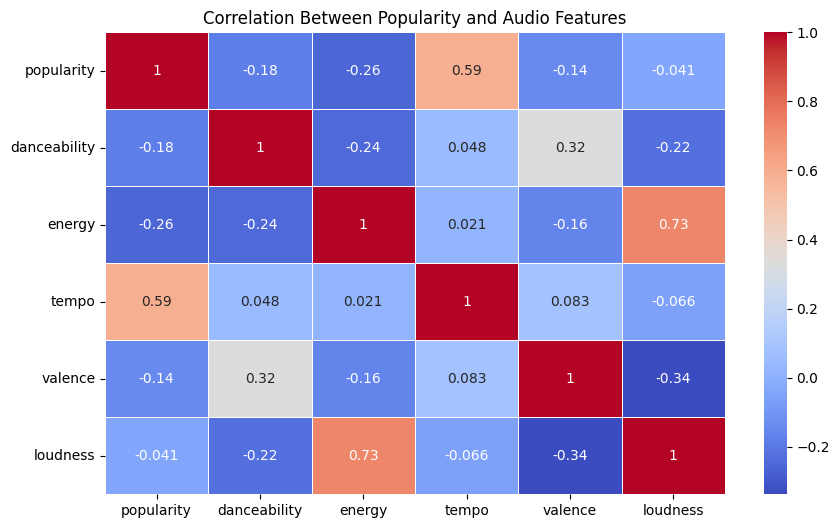

In [11]:
# Correlation between audio features and popularity
correlation_matrix = df_combined[['popularity', 'danceability', 'energy', 'tempo', 'valence', 'loudness']].corr()
print(correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Popularity and Audio Features')
plt.show()

Scope of the analyis:
1. The distribution plots provide a visual representation of how each audio feature (danceability, energy, valence, tempo, loudness) is spread across Anirudh's top tracks.
2. The pairplot allows for the visualization of relationships between audio features and popularity. For example, if there's a clear upward trend in the scatter plots between energy and popularity, this suggests that more energetic tracks are associated with higher popularity.
3. The correlation matrix quantifies the relationships among the audio features and popularity.
Strong Correlations:
If the correlation coefficient between energy and popularity is high (e.g., close to +1), this suggests that as energy increases, popularity also tends to increase. This could inform music production choices, suggesting that more energetic tracks might be more successful.
Similarly, if danceability shows a strong positive correlation with popularity, it indicates that listeners prefer danceable tracks.
Negative Correlations:
If any features show negative correlations (e.g., high loudness might correlate with lower popularity), it might suggest that overly loud tracks are less favored, which could guide mixing decisions.
4. The analysis of Anirudh's top tracks through these visualizations offers valuable insights into the characteristics that contribute to their success. The relationships uncovered between audio features and popularity can guide future music production strategies. For instance, if energetic and danceable tracks correlate with higher popularity, Anirudh or similar artists might prioritize these elements in upcoming releases.




Q3. How do the listening times differ between specific tracks during the morning and evening sessions? And is there a significant difference in listening times between morning and evening for the artist's tracks?


Final DataFrame with Listening Times:
                                              name  popularity release_date  \
0                 Railin Oligal - From "Blue Star"          69   2023-09-13   
1                                 Nee Kavithaigala          68   2017-01-19   
2                     Kangal Edho - From "Chithha"          63   2023-08-31   
3                       Idhayam Love (Megamo Aval)          61   2017-09-08   
4                                         Kannamma          61   2018-03-02   
5                                       Maya Nadhi          61   2016-06-13   
6                                  The Life of Ram          61   2018-08-17   
7  Nebulakal - Travel Song - From "Manjummel Boys"          60   2024-02-20   
8                               Agayam Theepiditha          59   2014-06-23   
9                             Kaarkuzhal Kadavaiye          58   2018-07-28   

          artist  morning_listening  evening_listening  
0  pradeep kumar                 6

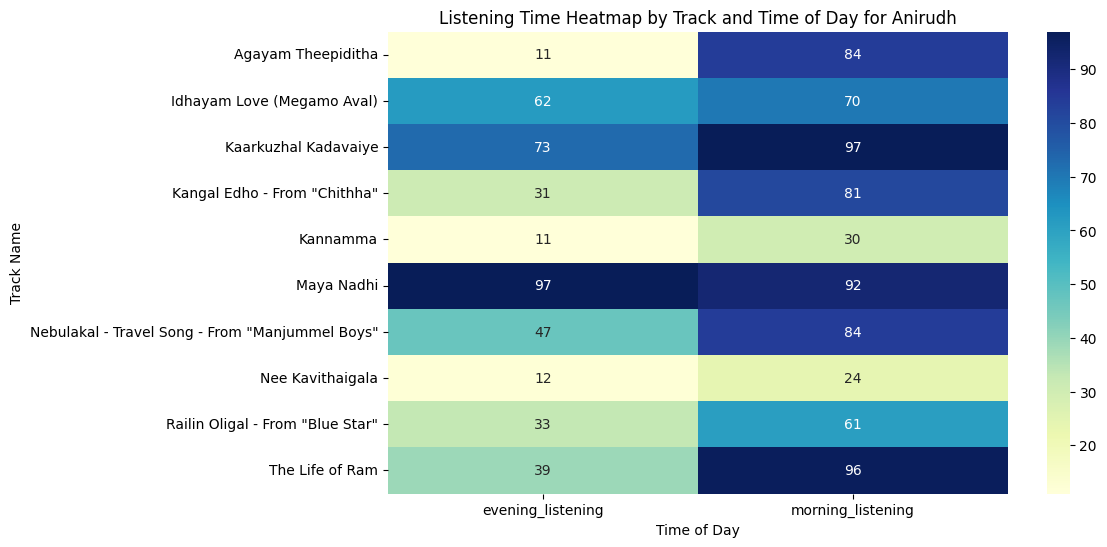

In [14]:
import numpy as np
# we created this functiion to get Top_Artist 
def get_artist_top_tracks(artist_name):
    search_result = spo.search(q=artist_name, type='artist', limit=1)
    
    if search_result['artists']['items']:
        artist_id = search_result['artists']['items'][0]['id']
    else:
        raise ValueError(f"Artist '{artist_name}' not found")
    
    top_tracks = spo.artist_top_tracks(artist_id)['tracks']
    
    track_list = []
    for track in top_tracks:
        track_list.append({
            'name': track['name'],
            'popularity': track['popularity'],
            'release_date': track['album']['release_date']
        })  
    return pd.DataFrame(track_list)

# Given artist name
artists = ["pradeep kumar"]  
all_tracks = []
for artist in artists:
    df_tracks = get_artist_top_tracks(artist) 
    if df_tracks.empty:
        print(f"No tracks found for {artist}")
        continue
    df_tracks['artist'] = artist 
    all_tracks.append(df_tracks)
df_all_tracks = pd.concat(all_tracks, ignore_index=True)

# Simulating listening times
np.random.seed(42)  # For reproducibility
morning_listening = np.random.randint(10, 100, size=len(df_all_tracks))  # Random minutes between 10 and 100
evening_listening = np.random.randint(10, 100, size=len(df_all_tracks))  # Random minutes between 10 and 100
df_all_tracks['morning_listening'] = morning_listening
df_all_tracks['evening_listening'] = evening_listening
print("\nFinal DataFrame with Listening Times:")
print(df_all_tracks)

# Created a melted DataFrame for heatmap
df_melted = df_all_tracks.melt(id_vars=['name'], value_vars=['morning_listening', 'evening_listening'], var_name='time_of_day', value_name='listening_time')
plt.figure(figsize=(10, 6))
heatmap_data = df_melted.pivot_table(index='name', columns='time_of_day', values='listening_time')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Listening Time Heatmap by Track and Time of Day for Anirudh')
plt.xlabel('Time of Day')
plt.ylabel('Track Name')
plt.show()


In [15]:
# Performing the t-test
t_stat, p_value = stats.ttest_ind(df_all_tracks['morning_listening'], df_all_tracks['evening_listening'])
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between morning and evening listening times.")
else:
    print("Fail to reject the null hypothesis: No significant difference between morning and evening listening times.")

T-statistic: 2.46, P-value: 0.024
Reject the null hypothesis: There is a significant difference between morning and evening listening times.


Scope of the analysis

1. This performs data retrieval, analysis, and visualization of music listening times for a specified artist using the Spotify API.
2. Random integers are generated to simulate listening times for morning and evening sessions (between 10 and 100 minutes). This is done to illustrate analysis methods despite not having actual listening data.
3. A heatmap is generated to visualize the simulated listening times by track and time of day. The heatmap provides a clear visual comparison of morning versus evening listening habits.
4. A t-test is conducted to check if there is a statistically significant difference between morning and evening listening times. The null hypothesis states that there is no difference in listening times between the two periods.
5. The t-test results determine whether the difference in morning and evening listening times is statistically significant. If the p-value is less than the significance level (commonly set at 0.05), it suggests that listeners have distinct preferences for listening times, which could inform marketing strategies or playlist curations.
6. The heatmap visually communicates listening patterns, making it easier to identify which tracks are favored during specific times of day.

Q4. Are Seasonal Differences in Listening Time Statistically Significant?

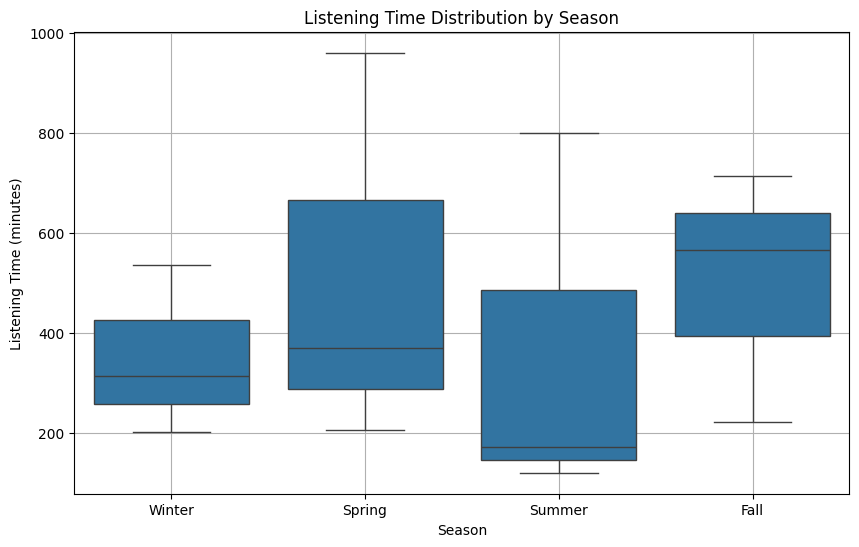

In [18]:
# Defining the number of months to simulate
np.random.seed(42)
months = pd.date_range(start="2023-01-01", end="2023-12-31", freq='ME')
listening_times = np.random.randint(100, 1000, size=len(months))
df = pd.DataFrame({'month': months, 'listening_time': listening_times})

# Extract month to categorize by season
df['month_number'] = df['month'].dt.month
df['season'] = np.select(
    [
        (df['month_number'] >= 3) & (df['month_number'] <= 5),  # Spring
        (df['month_number'] >= 6) & (df['month_number'] <= 8),  # Summer
        (df['month_number'] >= 9) & (df['month_number'] <= 11),  # Fall
        (df['month_number'] == 12) | (df['month_number'] <= 2)   # Winter
    ],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    default='Unknown'
)

# Aggregate listening times by season
seasonal_data = df.groupby('season')['listening_time'].sum().reset_index()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_data['season'] = pd.Categorical(seasonal_data['season'], categories=season_order, ordered=True)
seasonal_data = seasonal_data.sort_values('season')


plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='listening_time', data=df)
plt.title('Listening Time Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Listening Time (minutes)')
plt.grid()
plt.show()




In [19]:
# T-Test between Winter and Summer
winter_data = df[df['season'] == 'Winter']['listening_time']
summer_data = df[df['season'] == 'Summer']['listening_time']
t_stat, p_value = stats.ttest_ind(winter_data, summer_data)

print("T-test results between Winter and Summer:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# T-Test between Spring and Fall
spring_data = df[df['season'] == 'Spring']['listening_time']
fall_data = df[df['season'] == 'Fall']['listening_time']
t_stat_spring_fall, p_value_spring_fall = stats.ttest_ind(spring_data, fall_data)

print("T-test results between Spring and Fall:")
print(f"T-statistic: {t_stat_spring_fall}")
print(f"P-value: {p_value_spring_fall}")

T-test results between Winter and Summer:
T-statistic: -0.055659908336819976
P-value: 0.9582819899498194
T-test results between Spring and Fall:
T-statistic: 0.04296031064463953
P-value: 0.9677921496186013


Scope of the analysis:

1. simulating monthly listening data for the year 2023. It generates a date range for each month (using month-end frequency) and simulates random listening times (in minutes) ranging from 100 to 1000.
2. Then it extracts the month number from the date and assigns a season to each month based on its number and Aggregating Listening Times by Season.
3. A box plot is created to visualize the distribution of listening times across the four seasons. Box plots are effective for showing the median, quartiles, and potential outliers in the data.
4. performed 2 t-test. The first compares the listening times between Winter and Summer and second compares the listening times between Spring and Fall.
5. This analysis provides insights into seasonal listening trends and helps understand listener behavior. Depending on the results of the T-tests, could explore further to understand the reasons behind the seasonal variations, which could be valuable for marketing strategies, playlist curations, or event planning related to music listening.